In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Datasets/heart_disease.csv', sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Modifed Agg

In [4]:
df ['age'] = round(df['age']/365.25, 2).astype('int')

In [5]:
df.duplicated().sum()

0

Drop id column

In [6]:
df.drop('id', axis=1, inplace=True)

In [7]:
# rows and columns
df.shape

(70000, 12)

In [8]:
# count the number of missing value in each colum 
# There is no missing value in the dataste
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df.isnull().count()

age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [10]:
"""
Object columns are usually string,
but can also be arbitrary Python object (lists, dic)
"""
df.dtypes

age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [11]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.807329,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762506,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


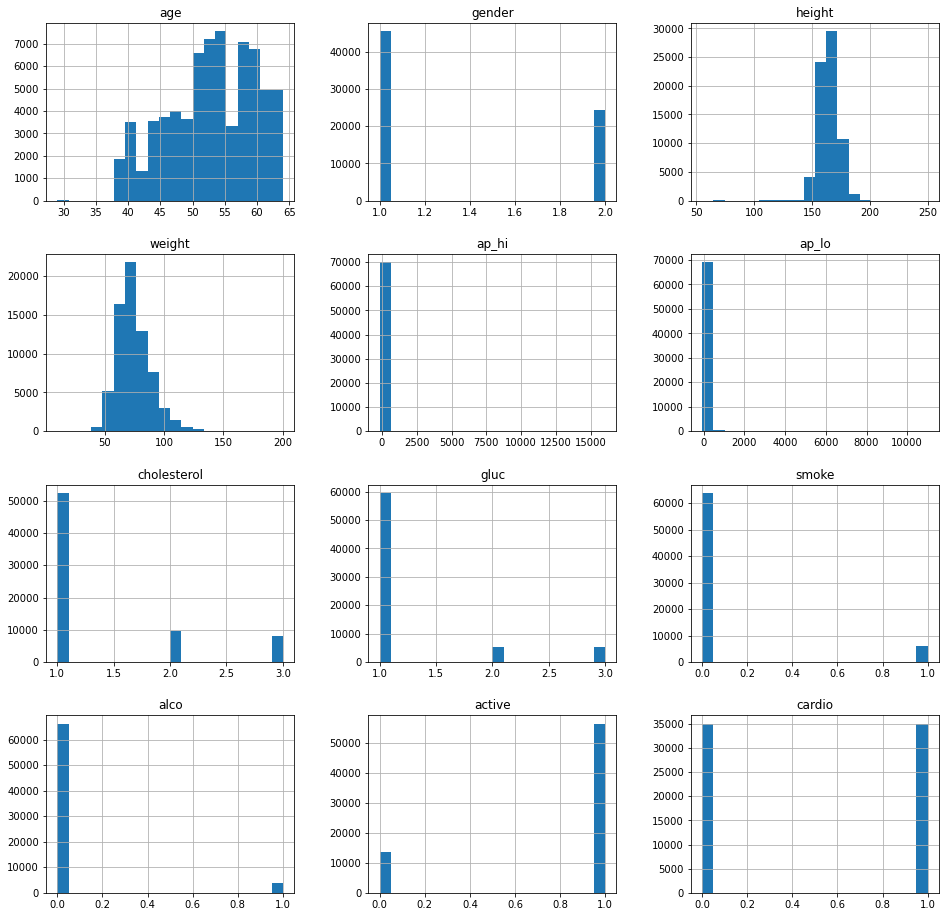

In [12]:
# Display the distribution 
df.hist(figsize=(16, 16), stacked=True, bins=20)
plt.show()

Visualizing presence or absence of cardiovascular disease

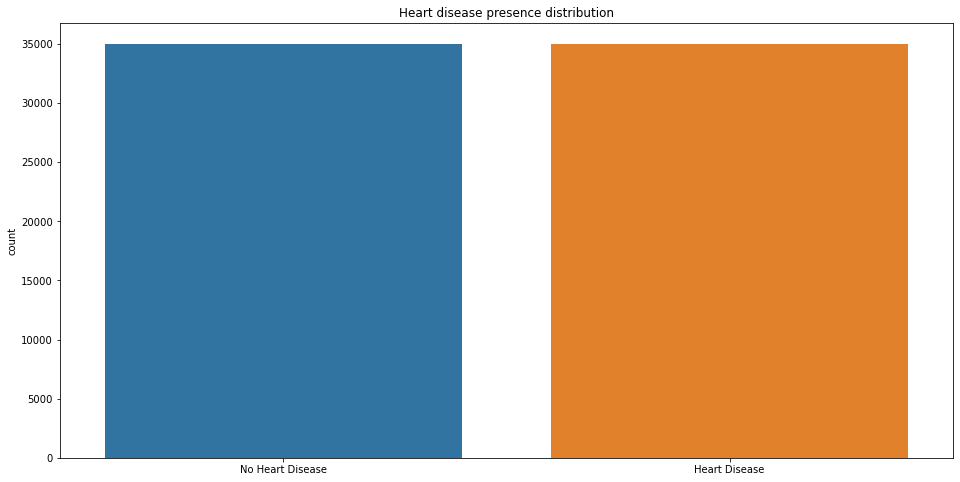

In [13]:
rcParams['figure.figsize'] = 16, 8
f = sns.countplot(x='cardio', data=df)
f.set_title('Heart disease presence distribution')
f.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.xlabel("")
plt.show()

Visualizing of cases occurs according the gender

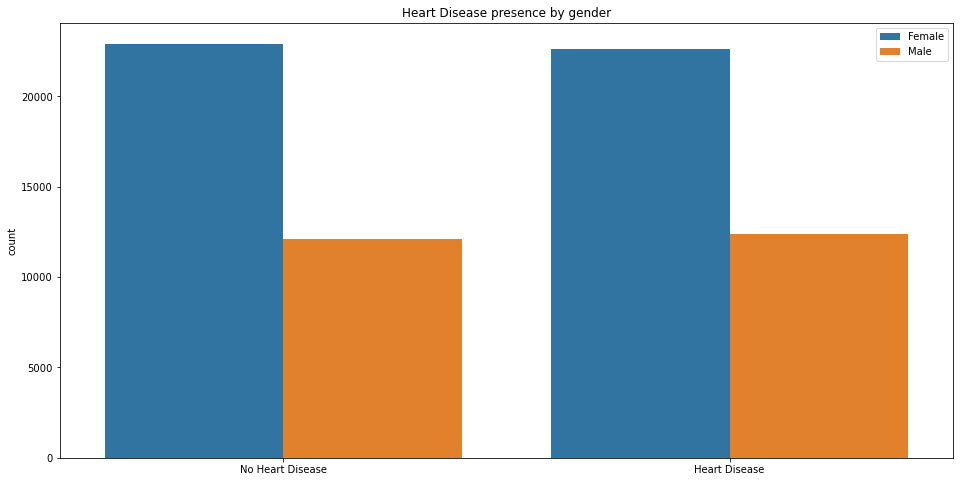

In [14]:
rcParams['figure.figsize'] = 16, 8
f = sns.countplot(x='cardio', data=df, hue='gender')
plt.legend(['Female', 'Male'])
f.set_title('Heart Disease presence by gender')
f.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.xlabel("")
plt.show()

Visualizing of cases occurs according the age

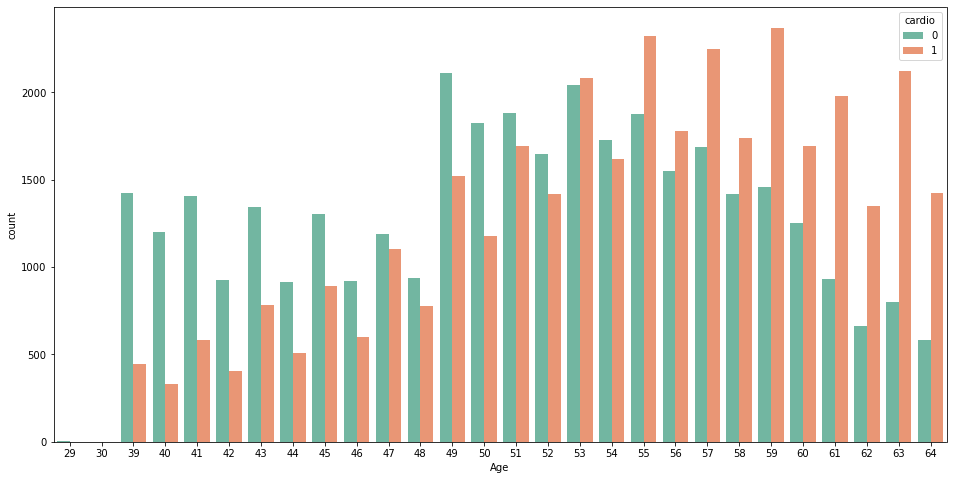

In [15]:
rcParams['figure.figsize'] = 16, 8
sns.countplot(x='age', hue='cardio', data=df , palette='Set2')
plt.xlabel("Age")
plt.show()

How many Smokers and Non-Smokers

In [16]:
numbers = df['smoke'].value_counts('0')
numbers

0    0.911871
1    0.088129
Name: smoke, dtype: float64

In [17]:
numbers_ns = 70000 *  0.088129
numbers_s =  70000 *  0.911871
print(f'There are {int(numbers_ns)} Non-Smoke and {int(numbers_s)} Smokers in the data set!')

There are 6169 Non-Smoke and 63830 Smokers in the data set!


Pearson correlation Coefficient & and P-value

Calculate the pearson correlation Coefficient & and P-value  of height and cardio

In [20]:
pearson_coef, p_value = stats.pearsonr(df['height'], df['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  -0.010821058331005218 with a p_value of p 0.004196298812995185


Calculate the pearson correlation Coefficient & and P-value  of weight and cardio

In [21]:
pearson_coef, p_value = stats.pearsonr(df['weight'], df['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.18165956179862539 with a p_value of p 0.0


Calculate the pearson correlation Coefficient & and P-value Systolic blood pressure and cardio

In [22]:
pearson_coef, p_value = stats.pearsonr(df['ap_hi'], df['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.05447505392686507 with a p_value of p 3.69809212578645e-47


Calculate the pearson correlation Coefficient & and P-value diastolic blood pressure and cardio

In [23]:
pearson_coef, p_value = stats.pearsonr(df['ap_lo'], df['cardio'])
print('The Pearson correlation Coefficient is: ', pearson_coef, 'with a p_value of p', p_value)

The Pearson correlation Coefficient is:  0.06571869614919185 with a p_value of p 7.424551291398159e-68
